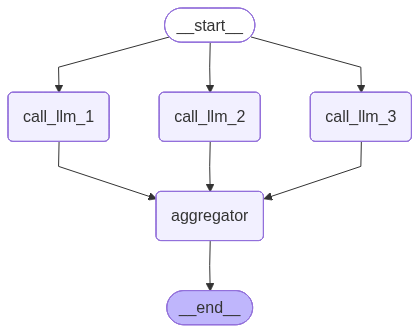

Here's a story, joke, and poem about cats!

STORY:
Once upon a time in a small town, there lived a group of stray cats who roamed the alleys and streets in search of food and shelter. Among them were Lucy, a playful tabby with bright green eyes, Oliver, a sleek black cat with a mischievous demeanor, and Whiskers, an older grey and white cat who acted as the wise leader of the group.

Every day the cats would go on adventures around the town, exploring new places and meeting new friends. They would often visit the local fish market to scavenge for scraps of fish and chat with the friendly fishmonger who always had a soft spot for the furry creatures.

One day, as the cats were lounging in the sun in the town square, they heard a loud commotion coming from a nearby alley. Curious, they went to investigate and found a small kitten trapped in a pile of trash. Without hesitation, Lucy, Oliver, and Whiskers sprang into action, working together to free the frightened kitten from its predicame

In [7]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from pydantic import BaseModel, Field
from langgraph.graph.message import add_messages
from IPython.display import Image, display
from dotenv import load_dotenv
import os
load_dotenv() 
from langchain_openai import ChatOpenAI
llm = ChatOpenAI()
# Graph state
class State(TypedDict):
    topic: str
    joke: str
    story: str
    poem: str
    combined_output: str


# Nodes
def call_llm_1(state: State):
    """First LLM call to generate initial joke"""

    msg = llm.invoke(f"Write a joke about {state['topic']}")
    return {"joke": msg.content}


def call_llm_2(state: State):
    """Second LLM call to generate story"""

    msg = llm.invoke(f"Write a story about {state['topic']}")
    return {"story": msg.content}


def call_llm_3(state: State):
    """Third LLM call to generate poem"""

    msg = llm.invoke(f"Write a poem about {state['topic']}")
    return {"poem": msg.content}


def aggregator(state: State):
    """Combine the joke and story into a single output"""

    combined = f"Here's a story, joke, and poem about {state['topic']}!\n\n"
    combined += f"STORY:\n{state['story']}\n\n"
    combined += f"JOKE:\n{state['joke']}\n\n"
    combined += f"POEM:\n{state['poem']}"
    return {"combined_output": combined}


# Build workflow
parallel_builder = StateGraph(State)

# Add nodes
parallel_builder.add_node("call_llm_1", call_llm_1)
parallel_builder.add_node("call_llm_2", call_llm_2)
parallel_builder.add_node("call_llm_3", call_llm_3)
parallel_builder.add_node("aggregator", aggregator)

# Add edges to connect nodes
parallel_builder.add_edge(START, "call_llm_1")
parallel_builder.add_edge(START, "call_llm_2")
parallel_builder.add_edge(START, "call_llm_3")
parallel_builder.add_edge("call_llm_1", "aggregator")
parallel_builder.add_edge("call_llm_2", "aggregator")
parallel_builder.add_edge("call_llm_3", "aggregator")
parallel_builder.add_edge("aggregator", END)
parallel_workflow = parallel_builder.compile()

# Show workflow
display(Image(parallel_workflow.get_graph().draw_mermaid_png()))

# Invoke
state = parallel_workflow.invoke({"topic": "cats"})
print(state["combined_output"])